In [1]:
# Reading the unmodified raw data
data_trans <- arules::read.transactions("../../data/raw/trans.csv", sep=',', format='basket', header=TRUE)

In [2]:
arules::inspect(head(data_trans))

    items                                    
[1] {IFX0014,IFX0049,MOP0083,TUC0302}        
[2] {APP1130,CRU0045,OWC0048,SEA0038}        
[3] {APP0405,APP1208}                        
[4] {APP0432,APP1457,APP2487,APP2552,BOS0059}
[5] {APP1208,APP1459,ELA0004,LAC0221,LGE0038}
[6] {APP1916,APP2498}                        


In [3]:
# Data is of the size that we expect
length(data_trans)

[1] 10453

In [4]:
# How many items does one transaction represent
summary(arules::size(data_trans))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.487   3.000  13.000 

In [5]:
# item labels
length(arules::itemLabels(data_trans))
# there are massive amount of unique items considering that we only have a bit over 10000 transactions. This will be a problem

[1] 4247

[1] 1

[1] 290

[1] 6.120085

[1] 2

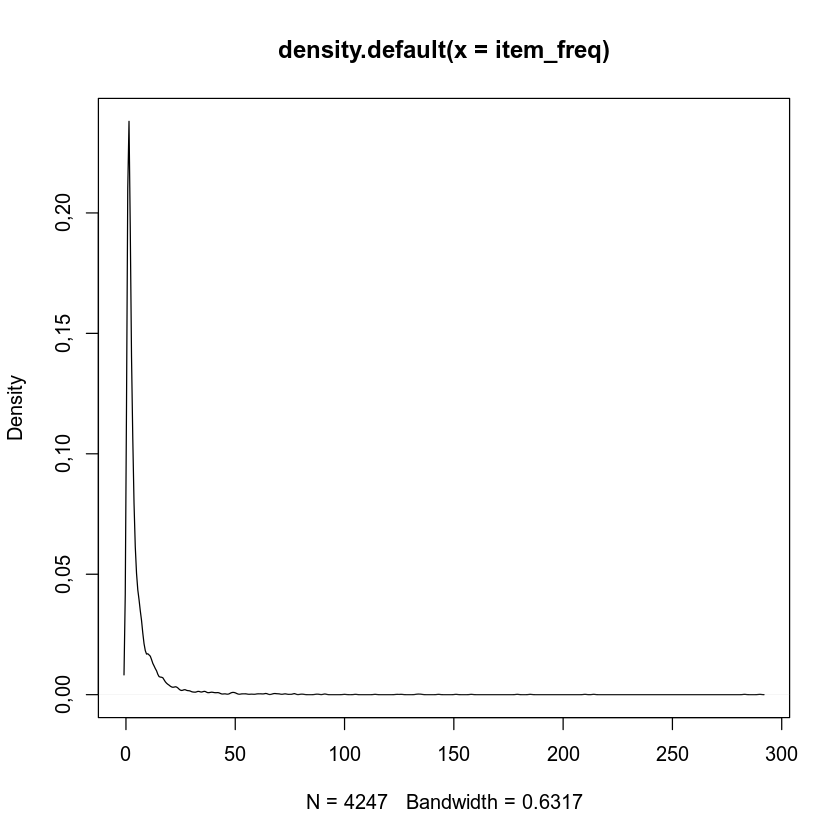

In [6]:
# There are very few items that make the bulk of the sales and long tale of rarely bought items
item_freq <- arules::itemFrequency(data_trans, type='absolute')
min(item_freq)
max(item_freq)
mean(item_freq)
median(item_freq)
plot(density(item_freq))

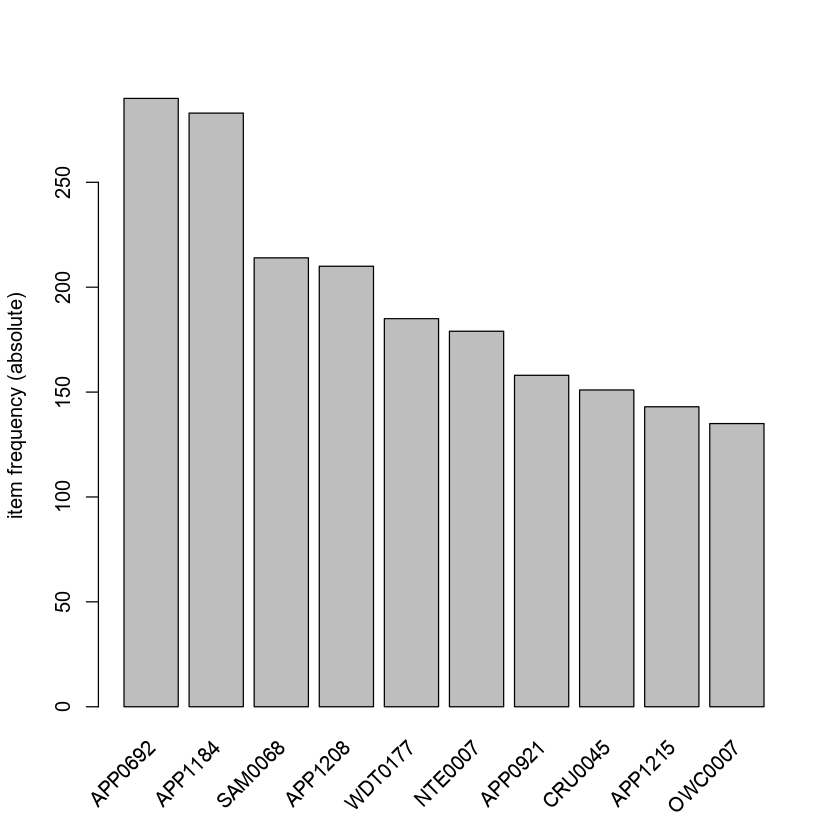

In [7]:
# Even for top combinations the frequencies are quite low
arules::itemFrequencyPlot(data_trans, type='absolute', topN=10)

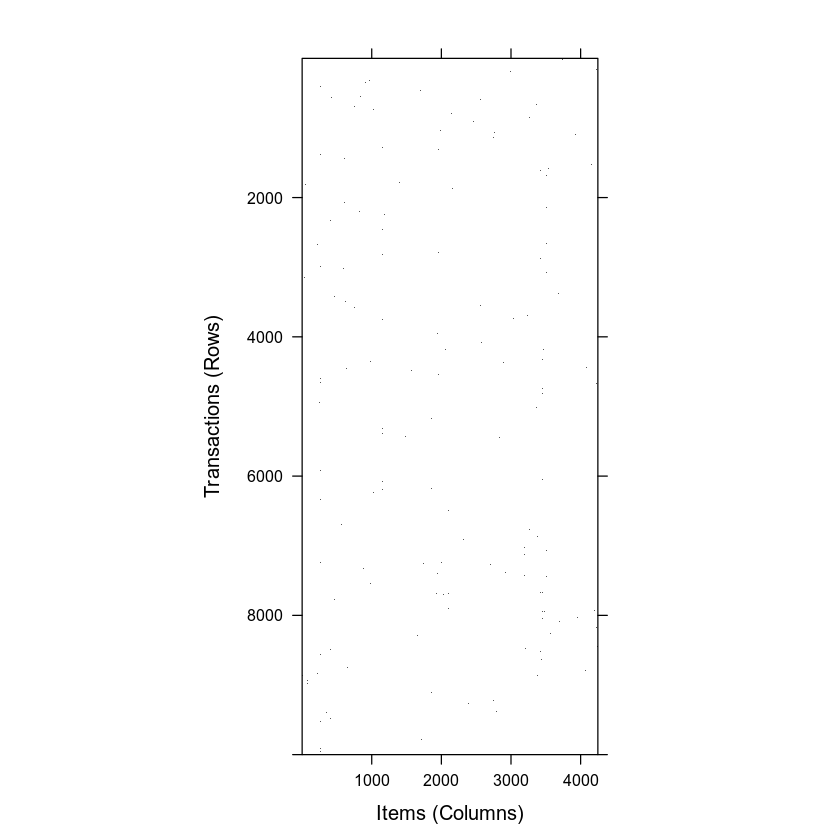

In [8]:
# There are so many different items and the items are quite rare, that transactions with items does not give much information 
arules::image(sample(data_trans, 10000))

In [9]:
# Even with very low support and confidence tresholds, very few suitable rules are found
rules <- arules::apriori(data_trans, parameter=list(support=0.001, confidence=0.4, target='rules'))
rules
arules::coverage(rules)
arules::DATAFRAME(rules)
arules::inspect(rules)
arules::interestMeasure(rules, measure="lift", transactions=data_trans)
# The found rules are statisticaly signicant, even with very stringent criteria
arules::is.significant(rules, data_trans, method='chisq', alpha=0.01, adjust='bonferroni')

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0,4    0,1    1 none FALSE            TRUE       5   0,001      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0,1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0,00s].
set transactions ...[4247 item(s), 10453 transaction(s)] done [0,01s].
sorting and recoding items ... [591 item(s)] done [0,00s].
creating transaction tree ... done [0,00s].
checking subsets of size 1 2 3 done [0,00s].
writing ... [18 rule(s)] done [0,00s].
creating S4 object  ... done [0,00s].


set of 18 rules 

[1] 0,001626327 0,001913326 0,002008993 0,002200325 0,002104659 0,002678657
 [7] 0,002774323 0,001913326 0,002295992 0,002295992 0,002200325 0,001817660
[13] 0,002678657 0,004304984 0,004687649 0,006505309 0,007366306 0,006696642

LHS,RHS,support,confidence,lift,count
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
{SPH0016},{SPH0015},"0,001052329","0,6470588","338,18529",11
{SPH0015},{SPH0016},"0,001052329","0,5500000","338,18529",11
{QNA0210},{WDT0177},"0,001147996","0,5714286","32,28726",12
{SYN0180},{WDT0177},"0,001243662","0,5652174","31,93631",13
{APP2142},{APP1215},"0,001147996","0,5454545","39,87158",12
{SYN0181},{WDT0177},"0,001339328","0,5000000","28,25135",14
{SYN0173},{WDT0177},"0,001339328","0,4827586","27,27717",14
{APP2485},{APP1184},"0,001052329","0,5500000","20,31502",11
{APP2117},{APP2155},"0,001052329","0,4583333","97,77466",11


     lhs          rhs       support     confidence lift      count
[1]  {SPH0016} => {SPH0015} 0,001052329 0,6470588  338,18529 11   
[2]  {SPH0015} => {SPH0016} 0,001052329 0,5500000  338,18529 11   
[3]  {QNA0210} => {WDT0177} 0,001147996 0,5714286   32,28726 12   
[4]  {SYN0180} => {WDT0177} 0,001243662 0,5652174   31,93631 13   
[5]  {APP2142} => {APP1215} 0,001147996 0,5454545   39,87158 12   
[6]  {SYN0181} => {WDT0177} 0,001339328 0,5000000   28,25135 14   
[7]  {SYN0173} => {WDT0177} 0,001339328 0,4827586   27,27717 14   
[8]  {APP2485} => {APP1184} 0,001052329 0,5500000   20,31502 11   
[9]  {APP2117} => {APP2155} 0,001052329 0,4583333   97,77466 11   
[10] {APP2117} => {APP1215} 0,001530661 0,6666667   48,73193 16   
[11] {APP1914} => {APP1041} 0,001147996 0,5217391  165,26482 12   
[12] {APP1803} => {APP1215} 0,001626327 0,8947368   65,40339 17   
[13] {APP0729} => {APP1913} 0,001147996 0,4285714   35,55442 12   
[14] {APP2086} => {APP1208} 0,002104659 0,4888889   24,33503 2

[1] 338,18529 338,18529  32,28726  31,93631  39,87158  28,25135  27,27717
 [8]  20,31502  97,77466  48,73193 165,26482  65,40339  35,55442  24,33503
[15]  40,27844  28,33955  22,00139  22,04374

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE

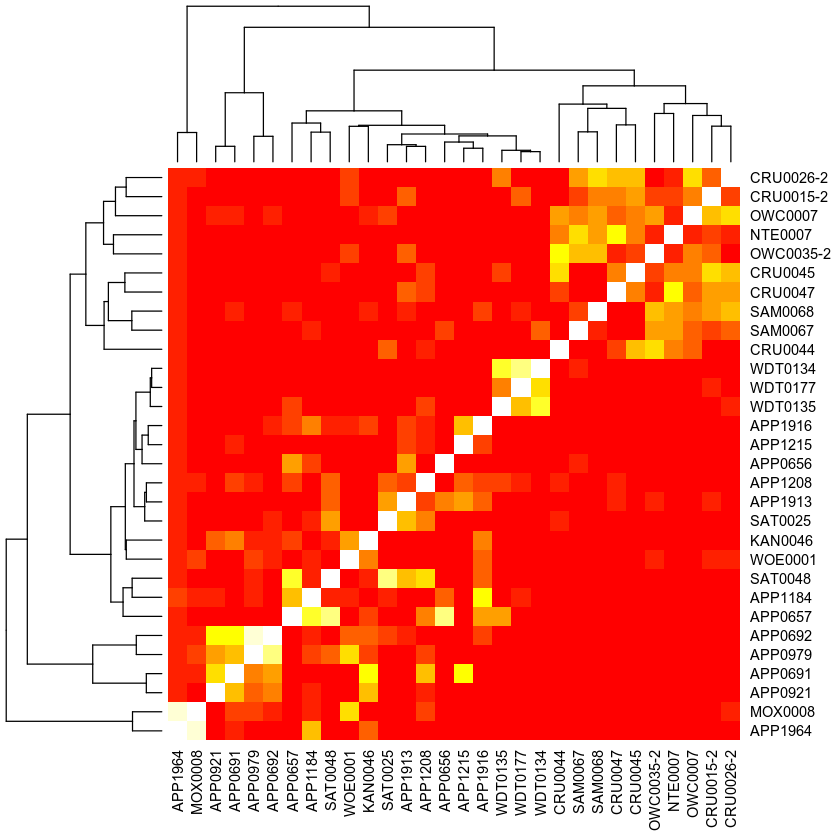

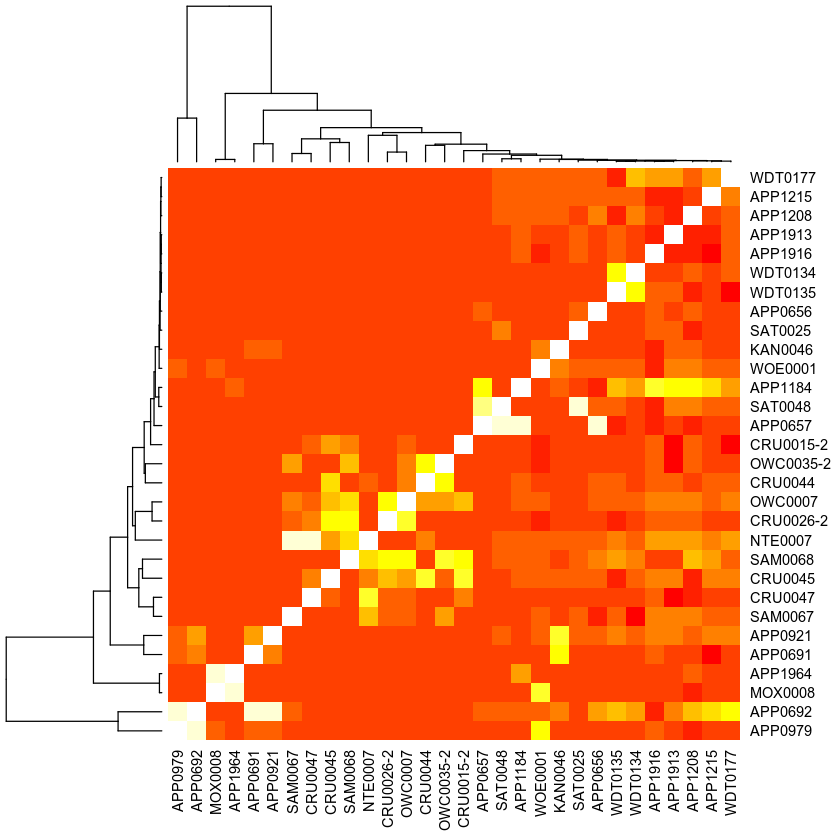

In [15]:
ct <- arules::crossTable(data_trans, sort=TRUE)
sp <- arules::crossTable(data_trans, measure="support", sort=TRUE)
lift <- arules::crossTable(data_trans, measure="lift", sort=TRUE)
chi2 <- arules::crossTable(data_trans, measure="chiSquared", sort=TRUE)
# heatmap(ct[1:30, 1:30], scale="column")
# heatmap(sp[1:30, 1:30], scale="column")
heatmap(lift[1:30, 1:30], scale="column")
heatmap(chi2[1:30, 1:30], scale="column")